## Part 2 - Final project - Fall 2023 -  Due Wednesday the 12/14/2023

## To begin your analysis, simply adjust the URL and the main keyword phrase. For large websites, consider selecting a sample of about 5 to 10 percent of all pages, but ensure you have at least 3 to 5 pages from the site for effective analysis. Proceed to run all the cells, and by the end, you should obtain a data frame. This process doesn't require any additional coding. The key goal is to identify a significant root in the polynomial that is relevant to the main keyword. You're not limited to using the Lagrange polynomial; alternative methods like Newton's, Hermite's, or Cubic Spline Interpolation are also viable options for your analysis.

In [2]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

Creating a function to extract all internal links from a webpage's homepage involves several steps. The function will need to:

Fetch the content of the given URL.
Parse the HTML content to find links.
Filter out the links to keep only internal ones.
Optionally, handle redirections and errors.
Here's a simple Python function using requests to fetch the webpage and BeautifulSoup from the bs4 package to parse the HTML. This function assumes that an internal link is any link that does not start with 'http://' or 'https://', or that starts with the base URL of the provided page.

In [3]:
def get_page_details(url):
    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')

        # Get the title of the page
        title = soup.title.string if soup.title else 'No title'

        # Get the description of the page
        description_tag = soup.find("meta", attrs={"name": "description"})
        description = description_tag["content"] if description_tag else 'No description'

        return title, description

    except requests.RequestException:
        return 'No title', 'No description'

"""
In this function, depth controls how deep the recursion goes. A depth of 1 means it will only fetch pages directly linked from the homepage.
Increasing this number will allow the function to follow links on subsequent pages, but be cautious as this can lead to a very large number of requests.
"""
def get_internal_links_with_details(url, depth, visited=None):
    if visited is None:
        visited = set()

    if depth == 0 or url in visited:
        return []

    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')
        visited.add(url)

        links = soup.find_all('a', href=True)

        base_url_parsed = requests.utils.urlparse(url)
        base_url = '{uri.scheme}://{uri.netloc}'.format(uri=base_url_parsed)

        page_details = []

        for link in links:
            href = link['href']
            full_url = urljoin(base_url, href)
            if full_url.startswith(base_url) and full_url not in visited:
                title, description = get_page_details(full_url)
                page_details.append((full_url, title, description))
                visited.add(full_url)
                page_details.extend(get_internal_links_with_details(full_url, depth-1, visited))

        return page_details

    except requests.RequestException as e:
        print(f"Error fetching page: {e}")
        return []

In [4]:
# type your URL here
url = "12passengervanrental.com"
depth = 1  # Don't adjust this for recursion depth
internal_links_details = get_internal_links_with_details(url, depth)
for link_detail in internal_links_details:
    print(link_detail)

Error fetching page: Invalid URL '12passengervanrental.com': No schema supplied. Perhaps you meant http://12passengervanrental.com?


To select randomly 20% of the pages obtained from the get_internal_links_with_details function, you can use Python's random.sample function. This function allows you to select a specified number of items from a list randomly.

Here's a function that takes the list of pages with their titles and descriptions and returns 20% of these pages, chosen randomly:

In [5]:
#the following randomly select 20% of the todal pages
import random

def select_random_pages(pages, percentage):
    if not pages or percentage <= 0:
        return []

    number_of_pages = len(pages)
    number_to_select = max(1, int((percentage / 100) * number_of_pages))

    return random.sample(pages, number_to_select)

# Example usage
# Assume `internal_links_details` is obtained from the `get_internal_links_with_details` function
selected_pages = select_random_pages(internal_links_details, 20)
for page in selected_pages:
    print(page)


# calculate the readability

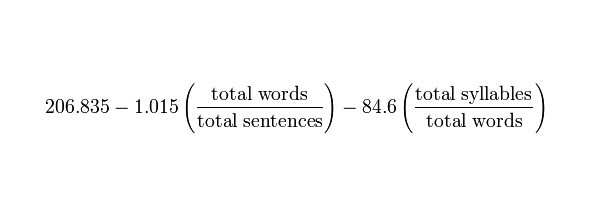
To calculate the readability of the descriptions using the [Flesch-Kincaid](https://en.wikipedia.org/wiki/Flesch%E2%80%93Kincaid_readability_tests) readability test, you can utilize the textstat library in Python, which provides an easy way to compute various readability scores, including the Flesch-Kincaid Grade Level.

First, you need to install the textstat library. You can do this using pip:

**Flesch-Kincaid Score**

Description Readability score

In [6]:
pip install textstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import textstat
header_data_for_analysis = [] # Storing title and descriptions in the list for later analysis.
def calculate_readability(pages):
    readability_scores = []
    for url, title, description in pages:
        score = textstat.flesch_kincaid_grade(description)
        readability_scores.append((url, title, score))
    return readability_scores

# Assuming `selected_pages` is a list of selected URLs with titles and descriptions
readability_scores = calculate_readability(selected_pages)
for url, title, score in readability_scores:
    print(f"URL: {url}, Title: {title}, Flesch-Kincaid Score: {score}")
    header_data_for_analysis.append([url,score])


# Natural language Processing (NLP) techniques

The following function will use simple string manipulation and natural language processing techniques to identify potentially meaningful phrases and words.

We will use the Natural Language Toolkit (nltk) for this purpose. First, ensure you have nltk installed:

In [8]:
pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.util import ngrams

In [10]:
# Ensure the necessary NLTK components are downloaded
nltk.download('punkt')
nltk.download('stopwords')

def extract_phrases_and_keywords(text):
    stop_words = set(stopwords.words('english'))

    # Tokenize the text into sentences
    sentences = sent_tokenize(text)

    # Extract phrases (n-grams) and keywords
    phrases = set()
    keywords = set()

    for sentence in sentences:
        # Tokenize the sentence into words
        words = word_tokenize(sentence)

        # Filter out stop words and single character words (like punctuation)
        filtered_words = [word for word in words if word.lower() not in stop_words and len(word) > 1]

        # Add filtered words to keywords
        keywords.update(filtered_words)

        # Create bigrams and trigrams from filtered words
        bigrams = ngrams(filtered_words, 2)
        trigrams = ngrams(filtered_words, 3)

        # Add bigrams and trigrams to phrases
        phrases.update([' '.join(gram) for gram in bigrams])
        phrases.update([' '.join(gram) for gram in trigrams])

    return list(phrases), list(keywords)

def analyze_urls(urls_with_details):
    analysis_results = []

    for url, title, description in urls_with_details:
        title_phrases, title_keywords = extract_phrases_and_keywords(title)
        description_phrases, description_keywords = extract_phrases_and_keywords(description)

        analysis_results.append({
            'URL': url,
            'Title': title,
            'Description': description,
            'Title Phrases': title_phrases,
            'Title Keywords': title_keywords,
            'Description Phrases': description_phrases,
            'Description Keywords': description_keywords
        })

    return analysis_results

[nltk_data] Downloading package punkt to /usr/local/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


This function will output the URL, title, description, along with the extracted phrases and keywords for both the title and the description.

In [12]:
url_analysis = analyze_urls(selected_pages)
def print_analysis_results(analysis_results):
    for item in analysis_results:
        print(f"URL: {item['URL']}")
        print(f"Title: {item['Title']}")
        print("Title Phrases:", ', '.join(item['Title Phrases']))
        print("Title Keywords:", ', '.join(item['Title Keywords']))
        print(f"Description: {item['Description']}")
        print("Description Phrases:", ', '.join(item['Description Phrases']))
        print("Description Keywords:", ', '.join(item['Description Keywords']))
        print("-" * 100)  # Separator for readability

# Example usage
print_analysis_results(url_analysis)


URL: https://github.com/features/actions
Title: Features • GitHub Actions · GitHub
Title Phrases: Actions GitHub, Features GitHub, GitHub Actions, GitHub Actions GitHub, Features GitHub Actions
Title Keywords: GitHub, Actions, Features
Description: GitHub is where people build software. More than 100 million people use GitHub to discover, fork, and contribute to over 420 million projects.
Description Phrases: use GitHub discover, people build software, GitHub discover, discover fork, use GitHub, 420 million projects, GitHub people, 100 million people, people use, 100 million, build software, fork contribute 420, fork contribute, 420 million, contribute 420 million, people use GitHub, million people use, people build, million people, million projects, discover fork contribute, GitHub people build, contribute 420, GitHub discover fork
Description Keywords: 420, contribute, fork, people, software, discover, build, projects, 100, million, use, GitHub
---------------------------------------

In [11]:
pip install networkx matplotlib

  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/d5/f0/8fbc882ca80cf077f1b246c0e3c3465f7f415439bdea6b899f6b19f61f70/networkx-3.2.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.5 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Creating a network graph that visualizes the connections between title keywords and description keywords is an interesting way to explore the relationships in your data. We'll use Python libraries networkx for creating the network graph and matplotlib for plotting it.

First, ensure you have networkx and matplotlib installed:

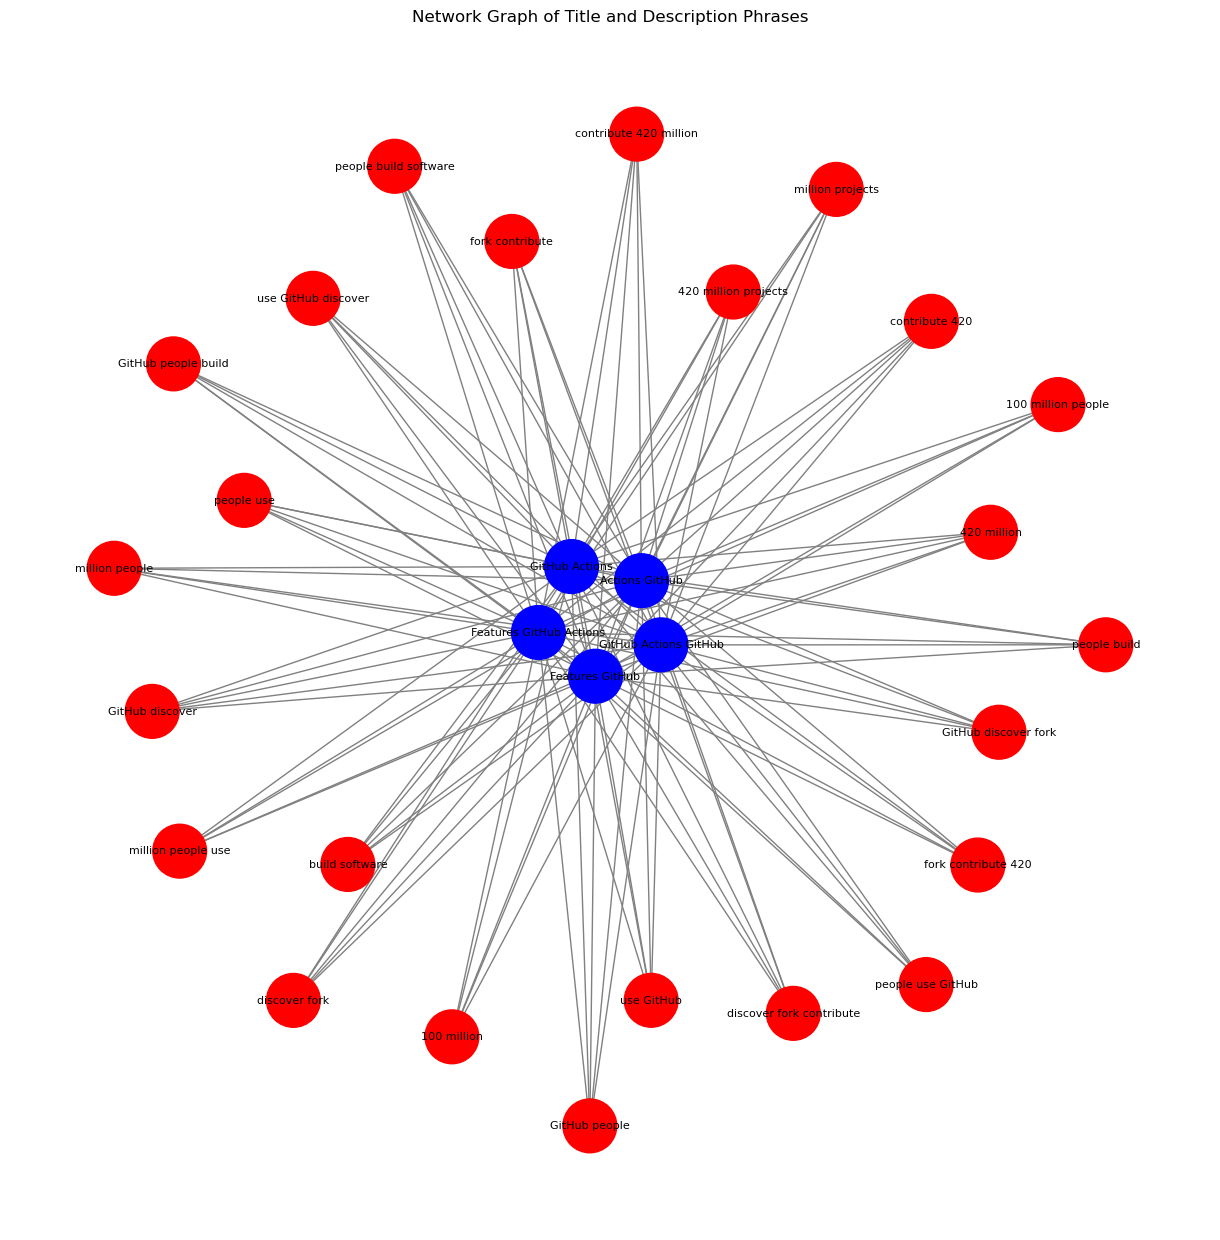

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_keywords_network(analysis_results):
    G = nx.Graph()

    for item in analysis_results:
        title_keywords = item['Title Phrases']
        description_keywords = item['Description Phrases']

        # Add nodes for each keyword
        for word in title_keywords:
            G.add_node(word, type='title', color='blue')

        for word in description_keywords:
            G.add_node(word, type='description', color='red')

        # Add edges between title and description keywords
        for title_word in title_keywords:
            for desc_word in description_keywords:
                G.add_edge(title_word, desc_word)
        break
    # Set node colors
    colors = [G.nodes[node]['color'] for node in G.nodes]

    # Draw the graph
    plt.figure(figsize=(12, 12))
    nx.draw(G, with_labels=True, node_color=colors, font_size=8, node_size=1500, edge_color='gray')
    plt.title("Network Graph of Title and Description Phrases")
    plt.show()

# Example usage
plot_keywords_network(url_analysis)


## Similarity Ratio

To create a function that computes the similarity ratio of a given phrase with each title and description, we can use cosine similarity from the scikit-learn library. This method measures the cosine of the angle between two non-zero vectors in a multi-dimensional space, which in our case will be vectors representing text.

First, install the necessary libraries:

In [12]:
pip install scikit-learn nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure the necessary NLTK components are downloaded
nltk.download('punkt')
nltk.download('stopwords')

def calculate_similarity(main_phrase, titles_descriptions):
    # Preprocess and tokenize the texts
    stop_words = set(stopwords.words('english'))

    def tokenize(text):
        words = word_tokenize(text)
        return [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

    # Combine the main phrase with titles and descriptions
    texts = [main_phrase] + [item['Title'] + " " + item['Description'] for item in titles_descriptions]
    #texts = [main_phrase] + [item['Description'] for item in titles_descriptions]
    # Compute TF-IDF representation
    vectorizer = TfidfVectorizer(tokenizer=tokenize)
    tfidf_matrix = vectorizer.fit_transform(texts)

    # Calculate cosine similarities
    cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()

    return cosine_similarities


[nltk_data] Downloading package punkt to /Users/k1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/k1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# change the following phrase base on your website
main_phrase = "best github page"
similarity_scores = calculate_similarity(main_phrase, url_analysis)

for i, item in enumerate(url_analysis):
    print(f"URL: {item['URL']}, Similarity Score: {similarity_scores[i]}")
    if len(header_data_for_analysis[0]) == 2: #making sure that we don't store duplicate vaule
      header_data_for_analysis[i].append(similarity_scores[i])

URL: https://github.com/features/actions, Similarity Score: 0.13367858851030787
URL: https://github.com/features/copilot, Similarity Score: 0.0
URL: https://github.community, Similarity Score: 0.03504830389424605
URL: https://github.com#productivity, Similarity Score: 0.07193254204460435
URL: https://github.com/dayhaysoos, Similarity Score: 0.06274016588945831
URL: https://github.com/git-guides, Similarity Score: 0.11484800129072992
URL: https://github.com, Similarity Score: 0.07193254204460435
URL: https://github.com/signup?ref_cta=Sign+up&ref_loc=header+logged+out&ref_page=%2F&source=header-home, Similarity Score: 0.13754527695248914
URL: https://github.com/sitemap, Similarity Score: 0.13754527695248914
URL: https://github.com#collaboration, Similarity Score: 0.07193254204460435
URL: https://github.com/organizations/enterprise_plan?ref_cta=Start+a+free+enterprise+trial&ref_loc=homepage+sticky+nav&ref_page=%2F, Similarity Score: 0.09713728396619536


In [13]:
pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [38]:
#extract readability scores from the readability's data
def extract_readability_scores(readability_data):
    # Extracting only the scores from the readability data
    scores = [item[2] for item in readability_data]  # assuming the score is the third element
    return scores
readability_scores_only = extract_readability_scores(readability_scores)
#print(scores_only)



## PART 2


---
## 🌼

## Run the following two modules

In [21]:
import collections
import re

## The function below is designed to extract purely the clean, human-readable text from a webpage, eliminating any HTML tags or scripts.

In [22]:
def return_clean_content_of_url(url):
    try:
        # Send a GET request to the URL
        response = requests.get(url)

        # Check if the request was successful
        if response.status_code != 200:
            return f"Failed to retrieve content from {url}"

        # Parse the content of the response with BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Remove elements that likely contain menu links (e.g., header, footer)
        # Adjust these selectors based on the specific HTML structure of the site
        for header in soup.find_all(['header', 'nav'], class_='menu-class-name'):
            header.decompose()
        for footer in soup.find_all('footer'):
            footer.decompose()

        # Find the <body> tag
        body_content = soup.body

        # Extract and return the text content from the <body> tag
        text_content = body_content.get_text(separator='\n', strip=True)
        return text_content

    except Exception as e:
        print(f"An error occurred: {e}")


## The following function returns the count of unique words for each page and identifies the top 10 frequently used words, excluding certain common stopwords. Feel free to modify the list of stopwords

---

In [23]:
def get_unique_and_common_words(text):
    # Split the text into words and filter out empty strings
    words = re.findall(r'\w+', text.lower())

    # Count the occurrences of each word
    word_counts = collections.Counter(words)

    # List of common stopwords
    stopwords = set(['and', 'a', 'was','is', 'are', 'the', 'as','in', 'of', 'to', 'for','i','we','he','my','me','you','us','it','s','so','our','with','about','on','may'])

    # Remove stopwords from the word count
    for stopword in stopwords:
        word_counts.pop(stopword, None)

    # Get the 19 most common words
    common_words = word_counts.most_common(10)

    # Number of unique words
    unique_words_count = len(word_counts)

    return unique_words_count, common_words


## The function below computes the similarity ratio between the main phrase and the content of the page.

In [24]:
def calculate_similarity_page(main_phrase, page_content):
    # Preprocess and tokenize the texts
    stop_words = set(stopwords.words('english'))

    def tokenize(text):
        words = word_tokenize(text)
        return [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

    # Combine the main phrase with titles and descriptions
    texts = [main_phrase] + [page_content]
    #texts = [main_phrase] + [item['Description'] for item in titles_descriptions]
    # Compute TF-IDF representation
    vectorizer = TfidfVectorizer(tokenizer=tokenize)
    tfidf_matrix = vectorizer.fit_transform(texts)

    # Calculate cosine similarities
    cosine_similarities = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:]).flatten()

    return cosine_similarities

## The following loop will calculate and display the total word count, the number of unique words, the readability score and similarity ratio for each page. Additionally, it will print a list of the top 10 most frequently occurring words.

In [26]:
data_for_analysis = [] #Storing data in this list for subsequent analysis.
for i, item in enumerate(url_analysis):
    page_url = item['URL']
    number_of_words = len(return_clean_content_of_url(page_url))
    unique_words_count = get_unique_and_common_words(return_clean_content_of_url(page_url))[0]
    readability_score = textstat.flesch_kincaid_grade(return_clean_content_of_url(page_url))
    page_similarity_ratio = calculate_similarity_page(main_phrase, return_clean_content_of_url(page_url))
    data_for_analysis.append([page_url,number_of_words,unique_words_count,readability_score,page_similarity_ratio])
    print ("--------------------------------")
    print(f"the Page: {page_url} contains {number_of_words} words in total, of which {unique_words_count} are unique, \nand it has a readability score of : {readability_score} with similarity ratio of:{page_similarity_ratio}")
    print (f" Here are the top 10 most common words with the frequency \n{get_unique_and_common_words(return_clean_content_of_url(page_url))[1]}")


--------------------------------
the Page: https://github.com/features/actions contains 15468 words in total, of which 658 are unique, 
and it has a readability score of : 13.5 with similarity ratio of:[0.10930352]
 Here are the top 10 most common words with the frequency 
[('should', 75), ('get', 66), ('actions', 52), ('your', 52), ('github', 43), ('respond', 41), ('users', 36), ('user', 29), ('code', 28), ('0', 21)]
An error occurred: 'NoneType' object has no attribute 'get_text'


TypeError: object of type 'NoneType' has no len()

In [23]:
len(data_for_analysis[0])

5

## The provided code generates a plot showcasing the frequency of the top 10 words on each selected page.

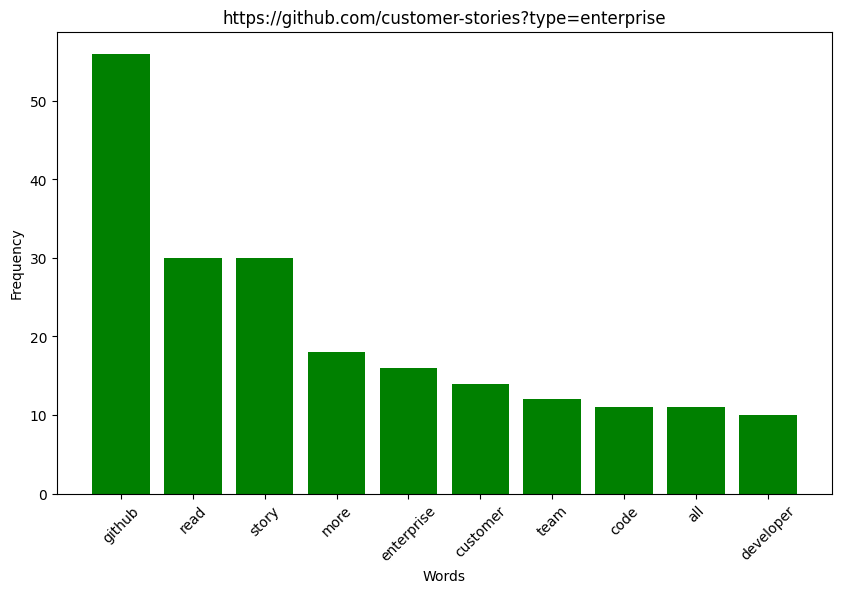

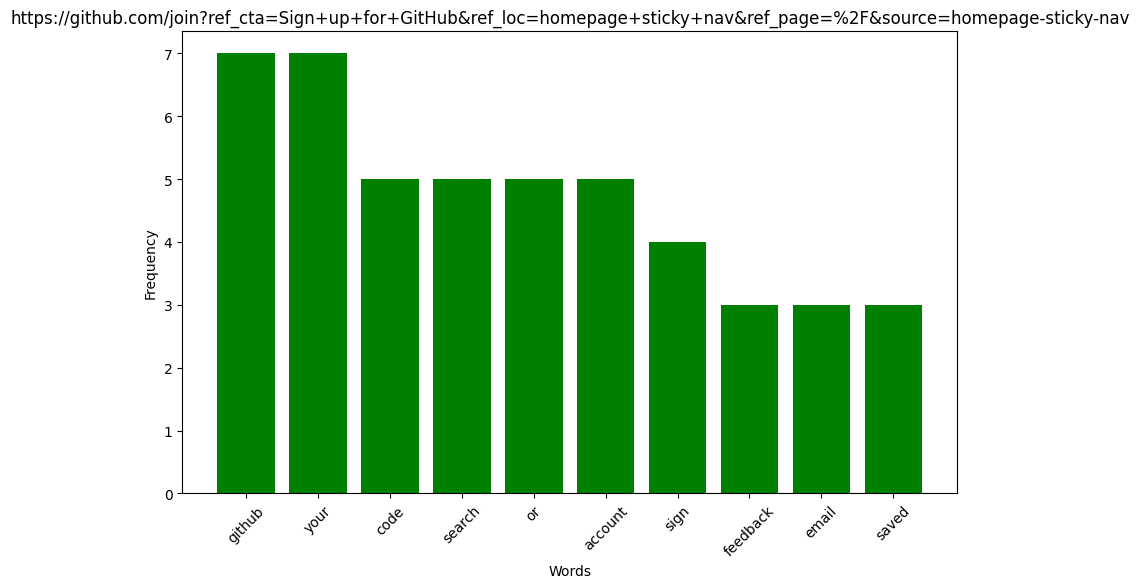

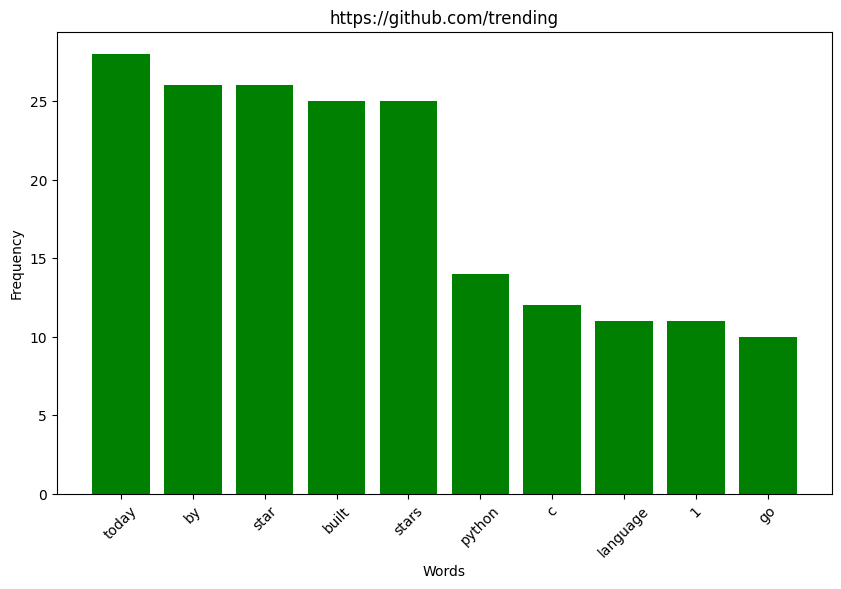

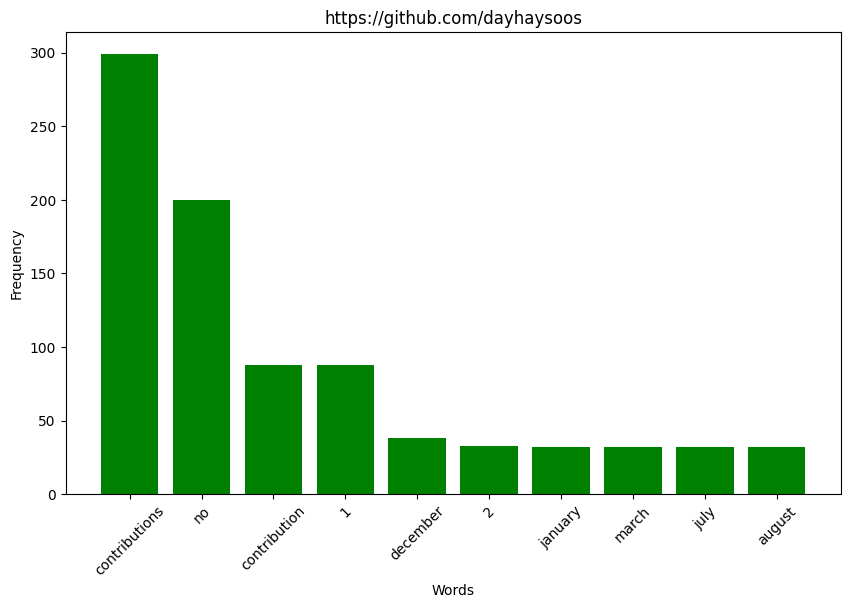

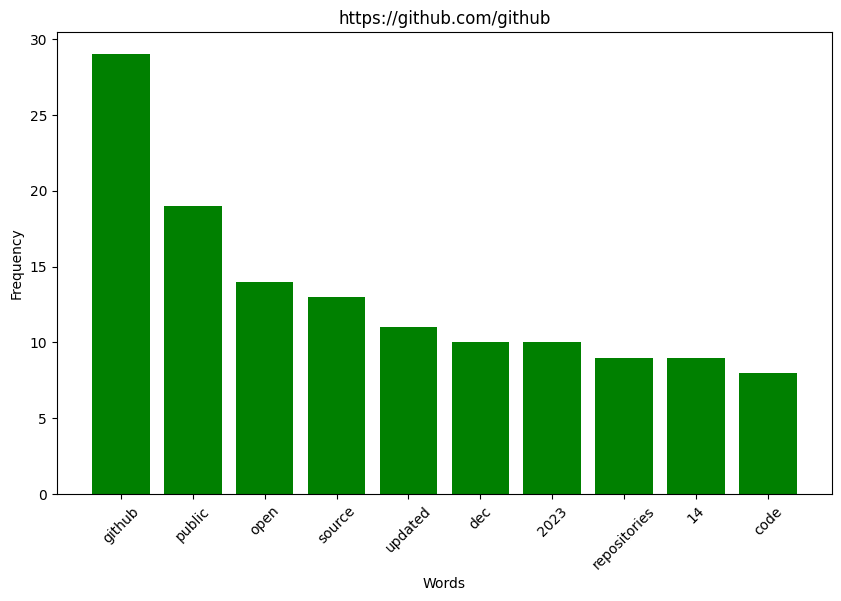

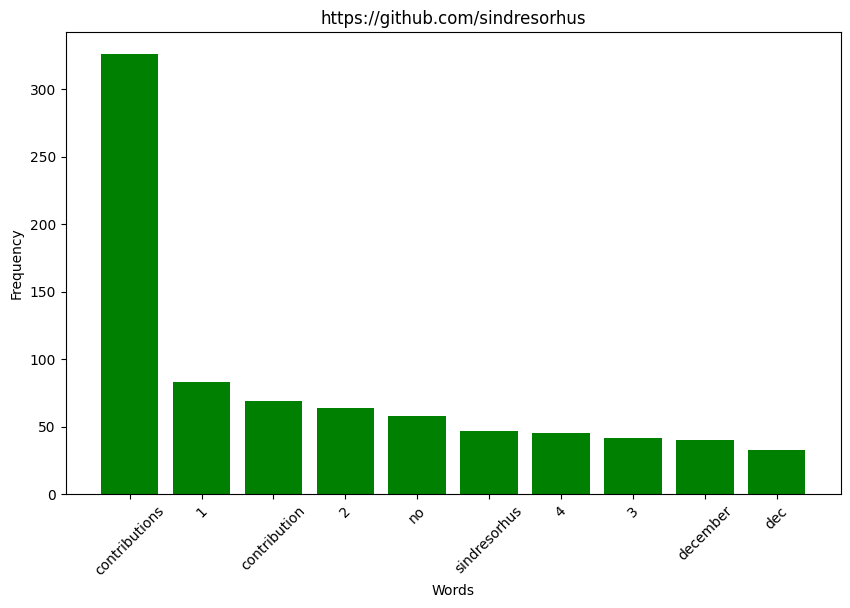

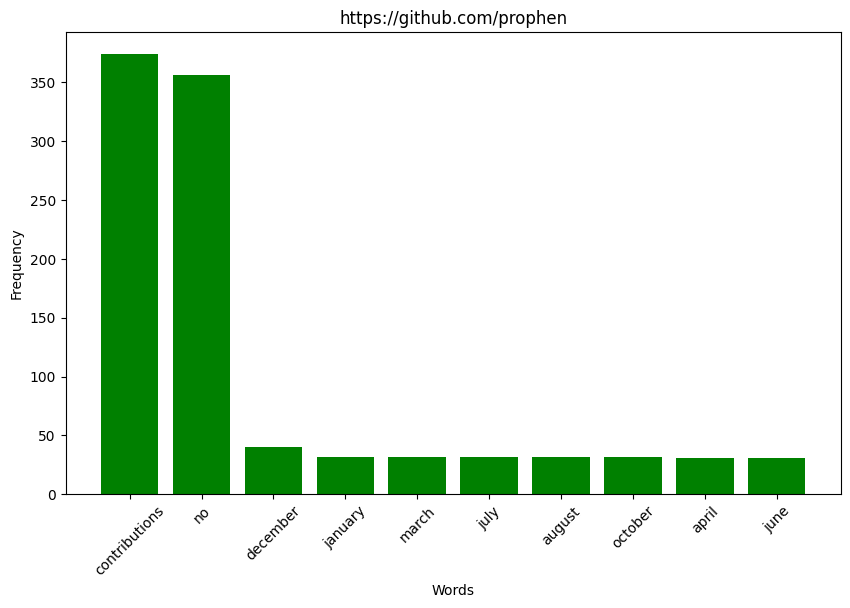

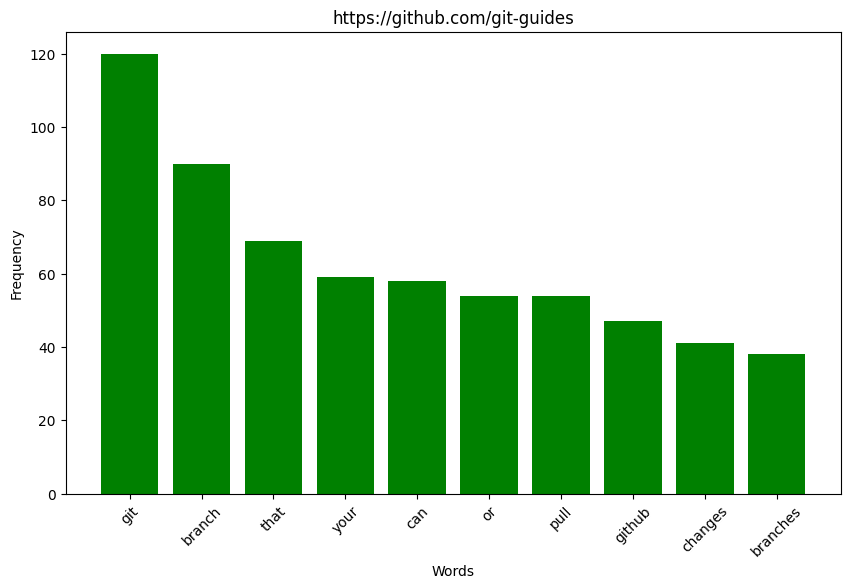

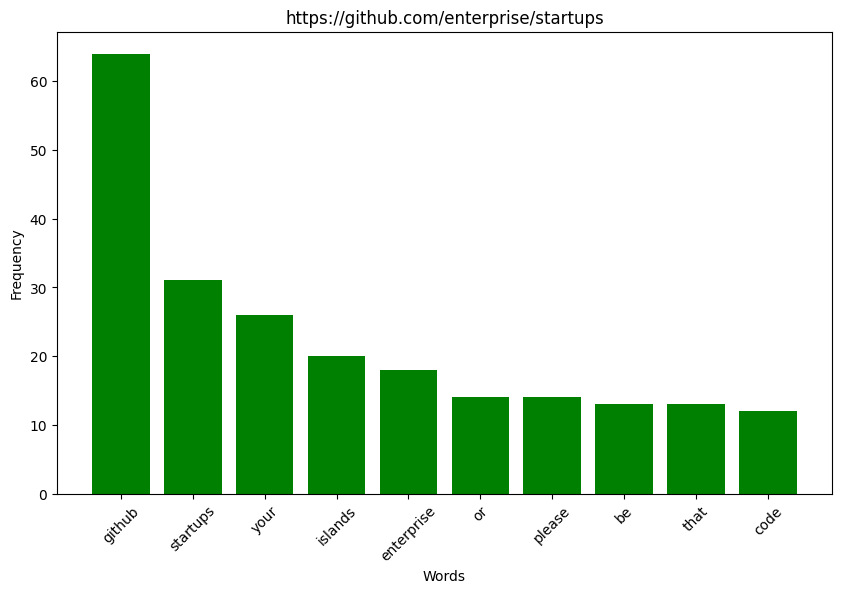

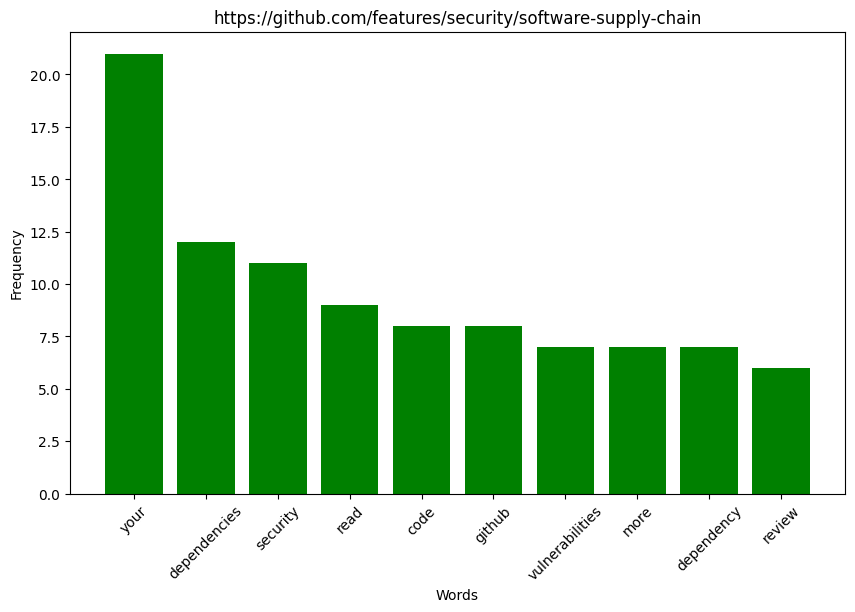

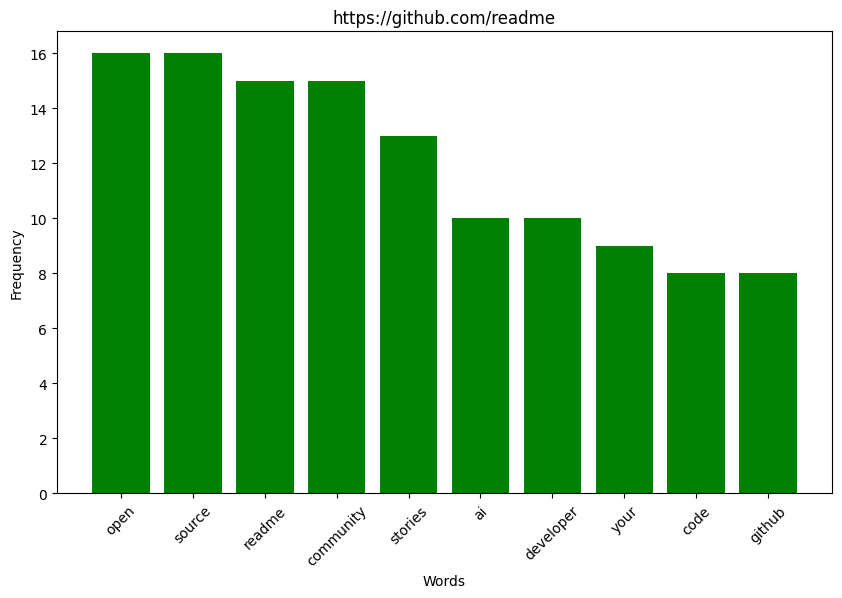

In [43]:
for i in range(len(url_analysis)):
  word_freq = get_unique_and_common_words(return_clean_content_of_url(url_analysis[i]['URL']))[1]
# Separating the words and their frequencies
  words, frequencies = zip(*word_freq)
# Plotting
  plt.figure(figsize=(10, 6))
  plt.bar(words, frequencies, color='green')
  plt.xlabel('Words')
  plt.ylabel('Frequency')
  plt.title(url_analysis[i]['URL'])
  plt.xticks(rotation=45)
  plt.show()



## To enhance visualization, the code below generates line plots featuring the top 10 most frequent words from each page.

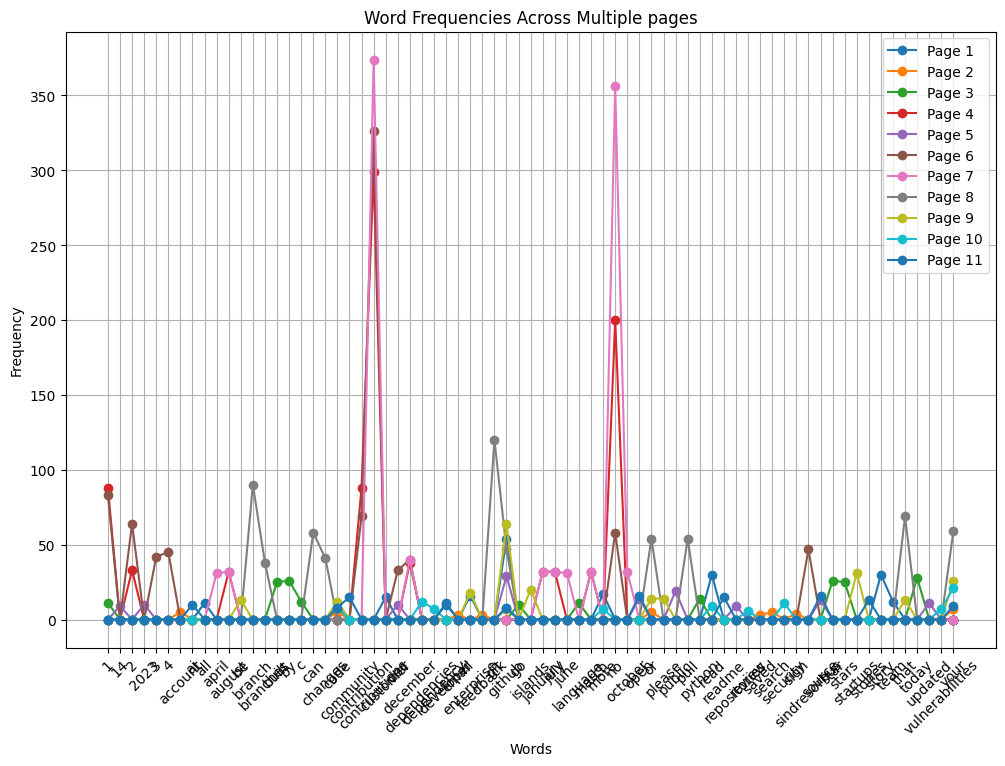

In [44]:
lists = []
for i in range(len(url_analysis)):
  word_freq = get_unique_and_common_words(return_clean_content_of_url(url_analysis[i]['URL']))[1]
  lists.append(word_freq)


# Getting the combined set of words from all lists
combined_words = sorted(set(word for lst in lists for word, _ in lst))

# Initializing an empty plot
plt.figure(figsize=(12, 8))

# Looping through each list to plot
for i, word_list in enumerate(lists):
    # Creating a frequency map for the current list
    freq_map = dict(word_list)

    # Creating a frequency list for each word in the combined set
    frequencies = [freq_map.get(word, 0) for word in combined_words]

    # Plotting the line chart for the current list
    plt.plot(combined_words, frequencies, label=f'Page {i+1}', marker='o')

# Setting up plot labels and title
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequencies Across Multiple pages')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Displaying the plot
plt.show()



## Polarity & Subjectivity

> **Polarity** is a float that lies between [-1,1], -1 indicates negative sentiment and +1 indicates positive sentiments.

> **Subjectivity** is also a float which lies in the range of [0,1]. Subjective sentences generally refer to personal opinion, emotion, or judgment.






For more info vist: https://www.tasq.ai/tasq-question/what-are-polarity-and-subjectivity-in-sentiment-analysis/

In [45]:
from textblob import TextBlob

for i in range(len(url_analysis)):
  page_content = return_clean_content_of_url(url_analysis[i]['URL'])
# Analyzing the sentiment of the page
  blob = TextBlob(page_content)
  sentiment = blob.sentiment
  if len(data_for_analysis[i]) == 5:
    data_for_analysis[i].append(sentiment)
  print ("for the page:", url_analysis[i]['URL'], sentiment)

for the page: https://github.com/customer-stories?type=enterprise Sentiment(polarity=0.2825510204081632, subjectivity=0.4257312925170068)
for the page: https://github.com/join?ref_cta=Sign+up+for+GitHub&ref_loc=homepage+sticky+nav&ref_page=%2F&source=homepage-sticky-nav Sentiment(polarity=0.13095238095238096, subjectivity=0.3923280423280423)
for the page: https://github.com/trending Sentiment(polarity=0.08035330523135402, subjectivity=0.3010238948043826)
for the page: https://github.com/dayhaysoos Sentiment(polarity=0.0535079365079365, subjectivity=0.17553968253968255)
for the page: https://github.com/github Sentiment(polarity=0.15391689103579345, subjectivity=0.39993928835392245)
for the page: https://github.com/sindresorhus Sentiment(polarity=0.09163476874003189, subjectivity=0.20572700691121737)
for the page: https://github.com/prophen Sentiment(polarity=0.06283653846153846, subjectivity=0.15294871794871792)
for the page: https://github.com/git-guides Sentiment(polarity=0.1756186190

## The code below generates a dataframe containing all the calculated numerical values.

In [46]:
import pandas as pd

# Converting to DataFrame
df_page = pd.DataFrame(data_for_analysis, columns=['URL', 'Page Total Words', 'Page Unique Words', 'Page Readability Score', 'Page Similarity ratio', 'Sentiment'])
df_title = pd.DataFrame(header_data_for_analysis,columns=['URL','Description Readability','Description Similarity ratio'])

df_page['Page Similarity ratio'] = df_page['Page Similarity ratio'].apply(lambda x: x[0])
df_page[['Page Polarity', 'Page Subjectivity']] = df_page['Sentiment'].apply(lambda x: pd.Series([x.polarity, x.subjectivity]))
df_page.drop('Sentiment', axis=1, inplace=True)

df = pd.merge(df_page, df_title, on='URL', how='inner')
df

,URL,Page Total Words,Page Unique Words,Page Readability Score,Page Similarity ratio,Page Polarity,Page Subjectivity,Description Readability,Description Similarity ratio
0,https://github.com/customer-stories?type=enter...,7838,435,15.4,0.447649,0.282551,0.425731,10.7,0.103031
1,https://github.com/join?ref_cta=Sign+up+for+Gi...,2081,184,10.0,0.305924,0.130952,0.392328,5.4,NaN
2,https://github.com/trending,13624,1433,23.9,0.068596,0.080353,0.301024,5.4,NaN
3,https://github.com/dayhaysoos,17364,430,8.2,0.019634,0.053508,0.175540,5.2,NaN
4,https://github.com/github,6512,480,12.0,0.336209,0.153917,0.399939,3.9,NaN
5,https://github.com/sindresorhus,19498,542,8.3,0.016966,0.091635,0.205727,6.4,NaN
6,https://github.com/prophen,16865,407,8.0,0.014135,0.062837,0.152949,4.1,NaN
7,https://github.com/git-guides,24810,589,7.8,0.148370,0.175619,0.422604,5.4,NaN
8,https://github.com/enterprise/startups,15702,827,13.0,0.396048,0.176382,0.366858,8.7,NaN
9,https://github.com/features/security/software-...,4034,262,14.1,0.230484,0.230447,0.509361,5.2,NaN


## DONE: 🙌

## Here's an open question for your analysis. There's no need for coding at this stage; you can export the above data to MATLAB, or any other program of your choice. Using the provided numerical values, construct a Lagrange polynomial. Select any two columns that you believe share a common characteristic to serve as the x and y values. You might need to construct multiple polynomials using different columns. The primary objective is to determine if you can find a meaningful root in the polynomial that relates to the main keyword. Feel free to employ other methods like Newton's, Hermite's, or Cubic Spline Interpolation for your analysis.




In [14]:
pip install scipy


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:1373: RuntimeWarning: divide by zero encountered in divide
  return poly1d(self.coeffs/other)
/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:843: RuntimeWarning: invalid value encountered in add
  val = a1 + a2


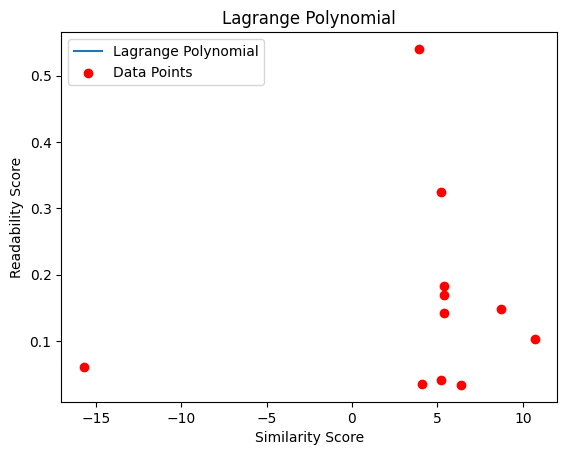

In [47]:
"""
Here's a function that constructs the Lagrange polynomial given the sets of x (similarity scores) and y (readability scores):
"""

from scipy.interpolate import lagrange
import numpy as np
import matplotlib.pyplot as plt

def create_lagrange_polynomial(x_points, y_points):
    # Ensure that the lengths of x_points and y_points are the same
    if len(x_points) != len(y_points):
        raise ValueError("The length of x_points must be equal to the length of y_points")

    # Construct the Lagrange polynomial
    polynomial = lagrange(x_points, y_points)

    return polynomial

# Example usage
y_points = similarity_scores
x_points = readability_scores_only

polynomial = create_lagrange_polynomial(x_points, y_points)

# Plotting the polynomial
x_range = np.linspace(min(x_points), max(x_points), 100)
y_range = polynomial(x_range)

plt.plot(x_range, y_range, label='Lagrange Polynomial')
plt.scatter(x_points, y_points, color='red', label='Data Points')
plt.xlabel('Similarity Score')
plt.ylabel('Readability Score')
plt.title('Lagrange Polynomial')
plt.legend()
plt.show()


Newton's method is an iterative numerical technique used to approximate the roots of a real-valued function.

First, ensure you have numpy and scipy installed:
pip install numpy scipy

/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:1373: RuntimeWarning: divide by zero encountered in divide
  return poly1d(self.coeffs/other)
/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:843: RuntimeWarning: invalid value encountered in add
  val = a1 + a2


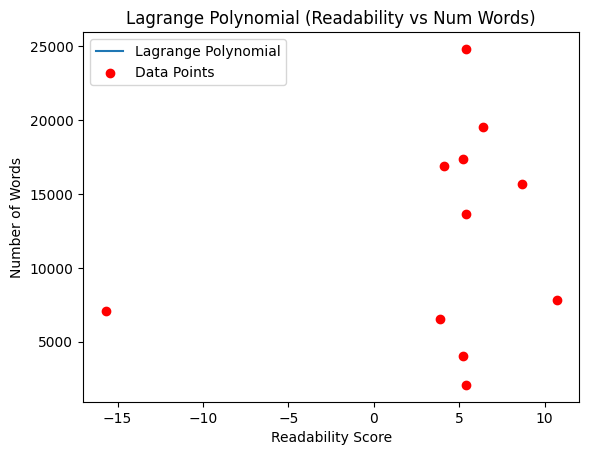

In [50]:
num_words = df.loc[:,"Page Total Words"]
readability = df.loc[:"Page Readability Score"]

# Example usage
y_points = num_words
x_points = readability_scores_only

polynomial = create_lagrange_polynomial(x_points, y_points)

# Plotting the polynomial
x_range = np.linspace(min(x_points), max(x_points), 100)
y_range = polynomial(x_range)

plt.plot(x_range, y_range, label='Lagrange Polynomial')
plt.scatter(x_points, y_points, color='red', label='Data Points')
plt.xlabel('Readability Score')
plt.ylabel('Number of Words')
plt.title('Lagrange Polynomial (Readability vs Num Words)')
plt.legend()
plt.show()

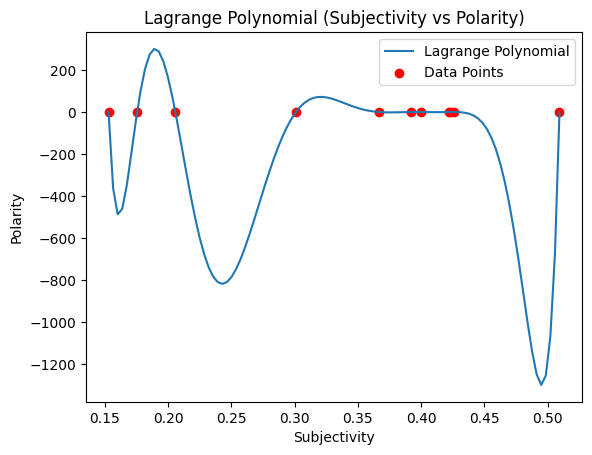

In [53]:
polarity_ = df.loc[:,"Page Polarity"]
subjectivity_ = df.loc[:,"Page Subjectivity"]

# Example usage
y_points = polarity_
x_points = subjectivity_

polynomial = create_lagrange_polynomial(x_points, y_points)

# Plotting the polynomial
x_range = np.linspace(min(x_points), max(x_points), 100)
y_range = polynomial(x_range)

plt.plot(x_range, y_range, label='Lagrange Polynomial')
plt.scatter(x_points, y_points, color='red', label='Data Points')
plt.xlabel('Subjectivity')
plt.ylabel('Polarity')
plt.title('Lagrange Polynomial (Subjectivity vs Polarity)')
plt.legend()
plt.show()

In [48]:
from scipy.optimize import newton


# Newton's method to find roots of the polynomial
def find_roots(polynomial, x_guesses):
    roots = []
    for guess in x_guesses:
        try:
            root = newton(polynomial, guess)
            roots.append(root)
        except RuntimeError:
            print(f"Failed to converge for guess: {guess}")
    return roots

# Initial guesses for roots
initial_guesses = [.132,.1323,.1324,0.1, 0.4, 0.16,.161,1,1.1]

# Find roots
roots = find_roots(polynomial, initial_guesses)
print("Roots of the polynomial:", roots)


Failed to converge for guess: 0.132
Failed to converge for guess: 0.1323
Failed to converge for guess: 0.1324
Failed to converge for guess: 0.1
Failed to converge for guess: 0.4
Failed to converge for guess: 0.16
Failed to converge for guess: 0.161
Failed to converge for guess: 1
Failed to converge for guess: 1.1
Roots of the polynomial: []
